In [964]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

# Data Exploration

In [965]:
df=pd.read_csv('customer_churn.csv')

In [966]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [967]:
df.shape

(7043, 21)

In [968]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [969]:
df['Churn'].value_counts()
# data is imbalanced highly biased towards No class

No     5174
Yes    1869
Name: Churn, dtype: int64

In [970]:
# dropping customer id

In [971]:
df.drop('customerID',axis=1,inplace=True)

In [972]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [973]:
# since Total charges is in object lets convert it to numeric

In [974]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [975]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [976]:
df1=df[df.TotalCharges!=' ']
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [977]:
df1.shape

(7032, 20)

In [978]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\hp\AppData\Local\Temp\ipykernel_10908\695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [979]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [980]:
df1.TotalCharges.dtypes

dtype('float64')

# Data Visuallization

In [981]:
#plotting tenure vs churn rate

In [982]:
churn_no=df1[df1.Churn=='No'].tenure
churn_yes=df1[df1.Churn=='Yes'].tenure

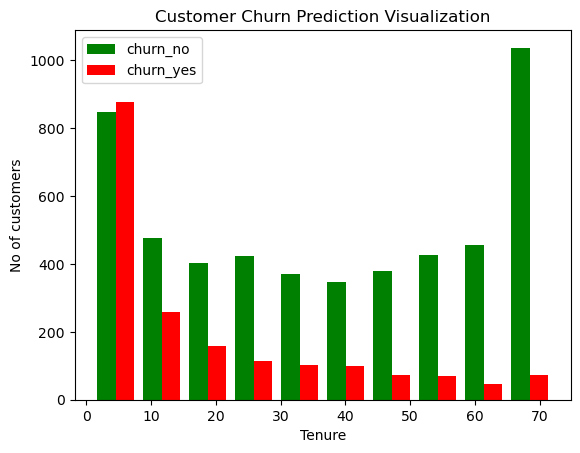

In [983]:
plt.hist([churn_no,churn_yes],color=['green','red'],label=['churn_no','churn_yes'])
plt.xlabel('Tenure')
plt.ylabel('No of customers')
plt.title('Customer Churn Prediction Visualization')
plt.legend()

In [984]:
#Observation 
# As the tenure is increasing churn_yes rate is decreasing

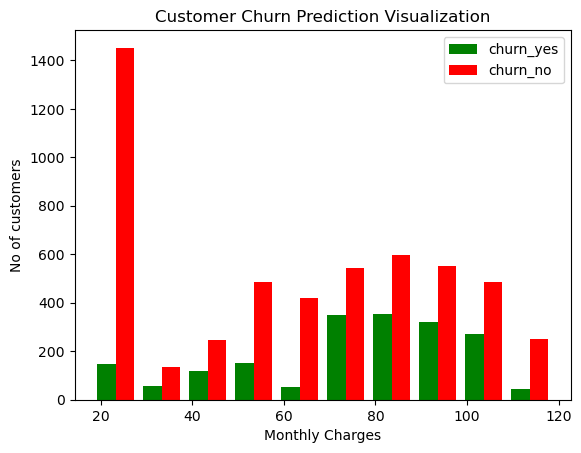

In [985]:
# plot using monthly charges
tenure_chur_no=df1[df1.Churn=='No'].MonthlyCharges
tenure_chur_yes=df1[df1.Churn=='Yes'].MonthlyCharges
plt.hist([tenure_chur_yes,tenure_chur_no],color=['green','red'],label=['churn_yes','churn_no'])
plt.xlabel('Monthly Charges')
plt.ylabel('No of customers')
plt.title('Customer Churn Prediction Visualization')
plt.legend()

In [986]:
## Data Cleaning
def print_unique_col_values(df1):
    for cols in df1:
        if df1[cols].dtypes=='object':
            print(f'{cols} : {df1[cols].unique()}')

In [987]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [988]:
df1=df1.replace('No internet service','No')
df1=df1.replace('No phone service','No')

In [989]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [990]:
## replacing yes/no with 1/0 
yes_no_cols=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
            'StreamingMovies','PaperlessBilling','Churn'  
            ]

for cols in yes_no_cols:
    df1[cols].replace({'Yes':1,'No':0},inplace=True)

In [991]:
for cols in df1:
    print(f'{cols} : {df1[cols].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [992]:
df1.gender.replace({'Female':1,'Male':0},inplace=True)

In [993]:
df1.gender.unique()

array([1, 0], dtype=int64)

# Feature Engineering

In [994]:
## doing one hot encoding for internet service,contract , payment
df1=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])

In [995]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [996]:
df1.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1476,0,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
771,0,0,0,0,15,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4505,1,0,1,0,72,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [997]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

In [998]:
## using minmax scaler for scaling cols
from sklearn.preprocessing import MinMaxScaler

In [999]:
scaler=MinMaxScaler()
df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])

In [1000]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


# Model Building

In [1001]:
X=df1.drop('Churn',axis=1)
y=df1['Churn']


In [1002]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [1003]:
X_train.shape,y_train.shape,X_test.shape

((5625, 26), (5625,), (1407, 26))

In [1004]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [1005]:
model.score(X_test,y_test)

0.7874911158493249

In [1006]:
y_pred=model.predict(X_test)

In [1007]:
y_pred[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [1008]:
y_test[:5]

2481    0
6784    0
6125    1
3052    0
4099    0
Name: Churn, dtype: int64

In [1009]:
from sklearn.metrics import classification_report

In [1010]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [1011]:
# since f-1 score of minority class is less so we can use diff techniques for handling imbalance data set

# Undersampling

In [1012]:
def logistic_reg(X_train,X_test,y_train,y_test):
    model=LogisticRegression()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(model.score(X_test,y_test))
    print(classification_report(y_test,y_pred))
    return y_pred
    

In [1013]:
df1.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [1014]:
count_0,count_1=df1.Churn.value_counts()

In [1015]:
count_0,count_1

(5163, 1869)

In [1016]:
df_0=df1[df1.Churn==0]
df_1=df1[df1.Churn==1]

In [1017]:
df_0.shape,df_1.shape

((5163, 27), (1869, 27))

In [1018]:
df_class_0_under=df_0.sample(count_1)
df_test_under=pd.concat([df_class_0_under,df_1],axis=0)
df_test_under.shape

(3738, 27)

In [1019]:
print('Random undersampling')
print(df_test_under.Churn.value_counts())

Random undersampling
0    1869
1    1869
Name: Churn, dtype: int64


In [1020]:
X=df_test_under.drop('Churn',axis=1)
y=df_test_under['Churn']


In [1021]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [1022]:
logistic_reg(X_train,X_test,y_train,y_test)

0.766042780748663
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       374
           1       0.77      0.76      0.77       374

    accuracy                           0.77       748
   macro avg       0.77      0.77      0.77       748
weighted avg       0.77      0.77      0.77       748



array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [1023]:
# Observation :
# There is change in f1 score from 0.56 to 0.74

# Oversampling

In [1024]:
count_0,count_1

(5163, 1869)

In [1025]:
df_class_1_over=df_1.sample(count_0,replace=True)
df_test_over=pd.concat([df_class_1_over,df_0],axis=0)

In [1026]:
df_test_over.Churn.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [1027]:
X=df_test_over.drop('Churn',axis=1)
y=df_test_over['Churn']

In [1028]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [1029]:
logistic_reg(X_train,X_test,y_train,y_test)

0.7434656340755083
              precision    recall  f1-score   support

           0       0.76      0.71      0.73      1033
           1       0.73      0.78      0.75      1033

    accuracy                           0.74      2066
   macro avg       0.74      0.74      0.74      2066
weighted avg       0.74      0.74      0.74      2066



array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [1030]:
#Obersevation there is change in f1 score from 0.56 to 0.78

# Smote

In [1031]:
X=df1.drop('Churn',axis=1)
y=df1['Churn']

In [1032]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [1033]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)

In [1034]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [1035]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=42,stratify=y_sm)

In [1036]:
logistic_reg(X_train,X_test,y_train,y_test)

0.7904162633107454
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1033
           1       0.77      0.83      0.80      1033

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [1037]:
#Observation there is change in f1 score 0.56 to 0.81 it's good

# Ensemble 

In [1038]:
df1.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [1039]:
X=df1.drop('Churn',axis=1)
y=df1['Churn']

In [1040]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [1041]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [1042]:
4130/1495

2.762541806020067

In [1043]:
df2=X_train.copy()
df2['Churn']=y_train

In [1044]:
df2_class_0=df2[df2.Churn==0]
df2_class_1=df2[df2.Churn==1]

In [1045]:
df2_class_0.shape,df2_class_1.shape

((4130, 27), (1495, 27))

In [1046]:
def get_train_batch(df_major,df_minor,start,end):
    df_train=pd.concat([df_major[start:end],df_minor],axis=0)
    X_train=df_train.drop('Churn',axis=1)
    y_train=df_train['Churn']
    
    return X_train,y_train
    

In [1047]:
X_train,y_train=get_train_batch(df2_class_0,df2_class_1,0,1495)

In [1048]:
X_train.shape

(2990, 26)

In [1049]:
y_pred1=logistic_reg(X_train,X_test,y_train,y_test)

0.720682302771855
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.48      0.77      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.74      1407



In [1050]:
y_pred1[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [1051]:
y_test[:5]

974     0
619     0
4289    0
3721    1
4533    0
Name: Churn, dtype: int64

In [1052]:
X_train,y_train=get_train_batch(df2_class_0,df2_class_1,1495,2990)

In [1053]:
X_train.shape

(2990, 26)

In [1054]:
y_pred2=logistic_reg(X_train,X_test,y_train,y_test)

0.7270788912579957
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407



In [1055]:
X_train,y_train=get_train_batch(df2_class_0,df2_class_1,2990,4485)

In [1056]:
y_pred3=logistic_reg(X_train,X_test,y_train,y_test)

0.6986496090973703
              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1033
           1       0.46      0.83      0.59       374

    accuracy                           0.70      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.70      0.72      1407



In [1057]:
y_pred_final=y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones=y_pred1[i]+y_pred2[i]+y_pred3[i]
    if n_ones>1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0
        

In [1059]:
y_pred_final[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [1060]:
y_test[:5]

974     0
619     0
4289    0
3721    1
4533    0
Name: Churn, dtype: int64

In [1061]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1033
           1       0.49      0.80      0.60       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.72      0.74      1407



In [1062]:
#Since Smote is giving best f1 score  among others